In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from chromalab.observer import Observer, Cone, transformToChromaticity, getHeringMatrix
from chromalab.spectra import Spectra, Illuminant, convert_refs_to_spectras
from chromalab.maxbasis import MaxBasis
from chromalab.visualizer import PSWrapper, DisplayBasisType, exportAndPlay, easeFunction
from chromalab.animation import *

objc[23461]: Class GLFWApplicationDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b87c2e28) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2d60366f0). One of the two will be used. Which one is undefined.
objc[23461]: Class GLFWWindowDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b87c2db0) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2d6036718). One of the two will be used. Which one is undefined.
objc[23461]: Class GLFWContentView is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b87c2e50) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [4]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths5 = np.arange(400, 701, 5)
wavelengths10 = np.arange(400, 701, 10)

In [5]:
wavelengths = np.arange(400, 710, 10)
d65 = Illuminant.get("D65")

In [6]:
# trichromat = Observer.trichromat(wavelengths=wavelengths5, illuminant=d65) 
# maxbasis_tri = MaxBasis(trichromat, verbose=True)
# # viz_tri = PSWrapper(trichromat, maxbasis_tri, itemsToDisplay=PSWrapper.ItemsToDisplay.MESH, displayBasis=DisplayBasisType.MAXBASIS, verbose=True)

tetrachromat = Observer.old_tetrachromat(wavelengths=wavelengths, illuminant=d65, verbose=True) 
maxbasis = MaxBasis(tetrachromat, verbose=True)
viz = PSWrapper(tetrachromat, maxbasis, itemsToDisplay=PSWrapper.ItemsToDisplay.BOTH, displayBasis=DisplayBasisType.MAXBASIS, verbose=True) 

100%|██████████| 28/28 [00:00<00:00, 96.08it/s]
/Users/jessicalee/Projects/generalized-colorimetry/code/ChromaLab/chromalab/spectra.py:36: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


[polyscope] Backend: openGL3_glfw -- Loaded openGL version: 4.1 Metal - 83.1


100%|██████████| 8990/8990 [00:19<00:00, 457.75it/s]


[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.25007252e-17  -2.29850861e-17  -4.85722573e-17   1.00000000e+00]
 [ -1.90819582e-16  -3.74700271e-16   1.00000000e+00  -4.51028104e-17]
 [ -3.12250226e-16   1.00000000e+00   2.56739074e-16  -1.08420217e-18]
 [  1.00000000e+00  -6.58978080e-16   6.12465807e-16  -4.26498030e-17]
 [ -1.49186219e-16  -3.88578059e-16   1.00000000e+00   1.00000000e+00]
 [ -2.63677968e-16   1.00000000e+00   2.08166817e-16   1.00000000e+00]
 [  1.00000000e+00  -6.72855868e-16   5.67362997e-16   1.00000000e+00]
 [ -4.99600361e-16   1.00000000e+00   1.00000000e+00  -4.51028104e-17]
 [  1.00000000e+00  -1.04755614e-15   1.00000000e+00  -8.73189325e-17]
 [  1.00000000e+00   1.00000000e+00   8.70072243e-16  -4.43845264e-17]
 [ -4.57966998e-16   1.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00  -1.06143393e-15   1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   8.21499986e-16   1.00000000e+00]
 [  1.

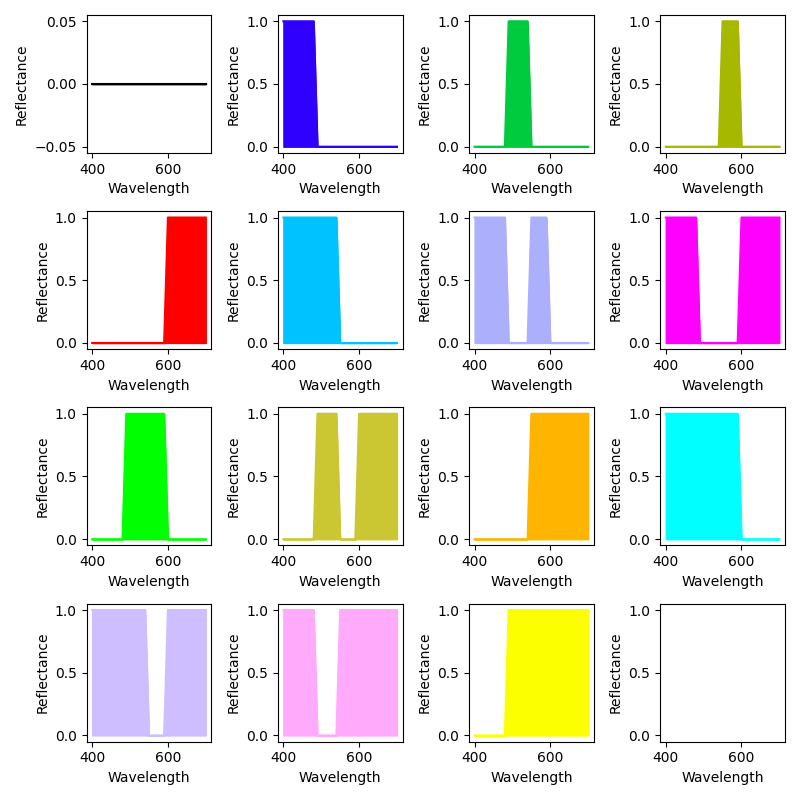

In [7]:
refs, discrete_points, rgbs, lines = maxbasis.getDiscreteRepresentation(reverse=False)
print(discrete_points)
fig, axs = plt.subplots(4, 4, figsize=(8, 8))

for i in range(4):
    for j in range(4):
        axs[i, j].plot(wavelengths, refs[i*4+j].data, c=rgbs[i*4 + j])
        axs[i, j].fill_between(wavelengths, refs[i*4+j].data, color=rgbs[i*4 + j])
        axs[i, j].set_xlabel('Wavelength')
        axs[i, j].set_ylabel('Reflectance')
        # axs[i, j].set_title(f'Ref {i*4+j}')

plt.tight_layout()
plt.show()


In [8]:
def point_light_demo():
    # Registering multiple point lights
    # As of now, can register up to 10 point lights
    light1_pos = np.array([0, 5, 5])
    light1_col = np.array([0.0, 0.0, 1.0])
    light1 = viz.ps.register_point_light("light 1", light1_pos, light1_col)

    light2_pos = np.array([0, 5, -5])
    light2_col = np.array([1.0, 0.0, 0.0])
    light2 = viz.ps.register_point_light("light 2", light2_pos, light2_col)

    light3_pos = np.array([0, 3, 0])
    light3_col = np.array([1.0, 1.0, 1.0])
    light3 = viz.ps.register_point_light("light 3", light3_pos, light3_col)

    light4_pos = np.array([0, -1, 0])
    light4_col = np.array([0.5, 0.5, 0.5])
    light4 = viz.ps.register_point_light("light 4", light4_pos, light4_col)

    # Other point light functions:
    light1.set_enabled(False)
    light1.set_position(np.array([0, 5, 6]))
    light1.set_color(np.array([0.0, 0.1, 1.0]))
    light1.set_enabled(True)


In [9]:
# general settings
viz.ps.set_ground_plane_mode("none")
offset = 0

# render all objects
viz.renderObjectsPS(mesh_alpha=0.8, lattice_alpha=1)
# viz.renderQArrow()

# transform to correct dir
mat = viz._getTransformQUpDir()
viz.ps.get_surface_mesh("mesh").set_transform(mat)
viz.ps.get_surface_mesh("lattice").set_transform(mat)
# viz.ps.get_surface_mesh("qarrow").set_transform(mat)

In [10]:
viz.ps.show()

In [11]:
names = ["mesh", "lattice", "qarrow"]

In [12]:
types =  ['surface_mesh', 'surface_mesh', 'surface_mesh']
map_name_type = {name:typ for name, typ in zip(names, types)}

anim = Animation(viz, map_name_type)
r = 4
theta = 300
phi = 80

short_frames = 30
long_frames = 90

In [13]:
# 5. Then, Lattice with Mesh, with Mesh and Lattice Alpha going down as it reaches Orange
filename = "./outputs/move_to_orange.mp4"
anim.set_enabled("mesh", True)
anim.set_enabled("lattice", True)
# anim.set_enabled("qarrow", False)
anim.set_transparency("lattice", 0.4)
anim.set_transparency("mesh", 0.8)
ref_points = (mat[:3, :3]@((viz.HMatrix@discrete_points.T)[1:, :])).T

magenta = ref_points[7]
orange = ref_points[5]

r_theta_phis = [orange, magenta]
polar = np.array([PSWrapper.cartesianToPolar(v[0], v[1], v[2]) for v in r_theta_phis])
polar[:, 0] = r

last_phi = polar[-1, -1]
path = [[r, theta, phi]] + polar.tolist()

fd = viz.openVideo(filename)
moveAlongToOrange = anim.MoveAlongPath(short_frames, path[:2], lookAt=[0, 0, 0])
fadeInLattice = anim.FadeIn("lattice", short_frames, [0.4, 1])
concatenated = anim.concatFns([moveAlongToOrange, fadeInLattice])
offset = viz.renderVideo(concatenated, fd, short_frames, offset)


fadeOutLattice = anim.FadeOut("lattice", short_frames, [0, 0.4], removeBefore=10)
fadeInMesh = anim.FadeIn("mesh", short_frames, [0.8, 1])
offset = viz.renderVideo(anim.concatFns([fadeOutLattice, fadeInMesh]), fd, short_frames, offset)

viz.closeVideo(fd)

ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex 

: 